In [26]:
#Cargamos el dataset y revisamos la información general

In [27]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('games.csv')
print(df.info())
print(df.head())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29

In [28]:
#Reemplazar nombres de columnas

In [29]:
df.columns = df.columns.str.lower()
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [30]:
#Convertir tipos a numeric,todos,asi no hayerrores

In [31]:

df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
df['na_sales'] = pd.to_numeric(df['na_sales'], errors='coerce')
df['eu_sales'] = pd.to_numeric(df['eu_sales'], errors='coerce')
df['jp_sales'] = pd.to_numeric(df['jp_sales'], errors='coerce')
df['other_sales'] = pd.to_numeric(df['other_sales'], errors='coerce')
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [32]:
# Tratar valores ausentes
df['user_score'].fillna(df['user_score'].median(), inplace=True)
df['critic_score'].fillna(df['critic_score'].median(), inplace=True)
df['rating'].replace('tbd', np.nan, inplace=True)

In [33]:
# Calcular ventas totales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

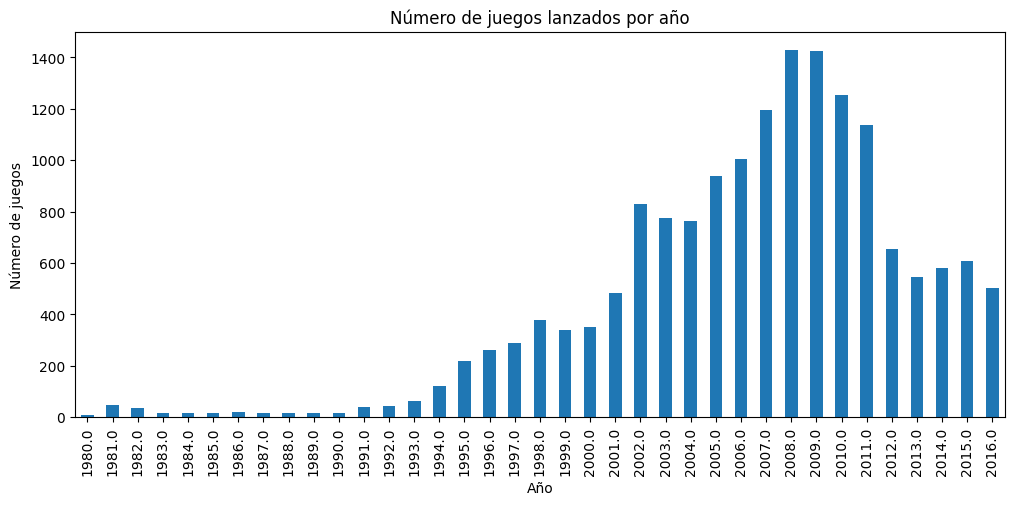

In [9]:
#Distribución de juegos por año
df['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Número de juegos')
plt.show()

In [10]:
#Se observa un pico entre 2005 y 2010, lo que coincide con la era de las consolas **PS3, Xbox 360 y Wii**. A partir de 2015, hay una disminución, posiblemente por el cambio a juegos digitales y plataformas como Steam o Switch.

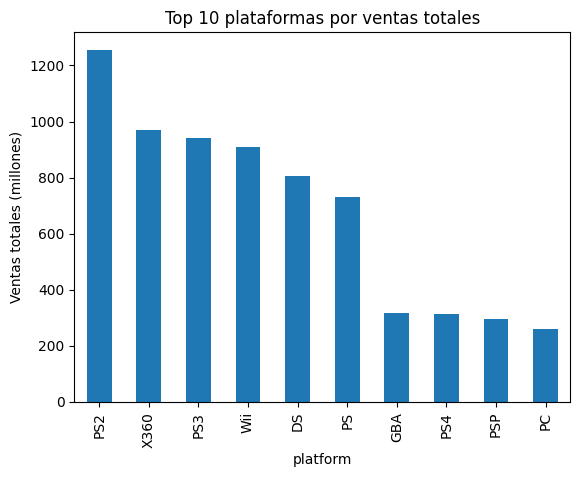

In [11]:
#Ventas por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales.head(10).plot(kind='bar')
plt.title('Top 10 plataformas por ventas totales')
plt.ylabel('Ventas totales (millones)')
plt.show()

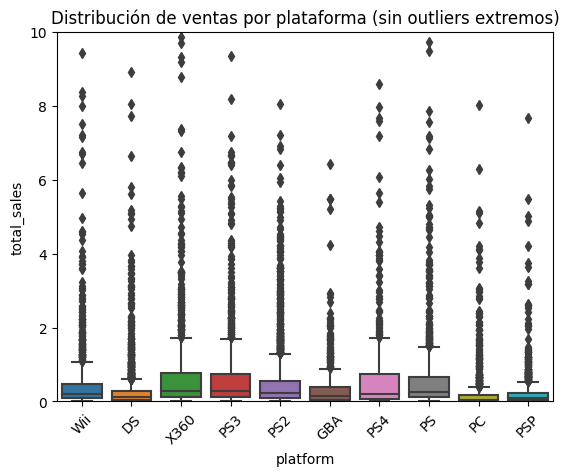

In [12]:
#Diagrama de caja por plataforma
# Limitamos el eje Y para ver mejor las cajas
top_platforms = platform_sales.head(10).index
sns.boxplot(data=df[df['platform'].isin(top_platforms)], x='platform', y='total_sales')
plt.ylim(0, 10)  #Limitamos el eje Y
plt.xticks(rotation=45)
plt.title('Distribución de ventas por plataforma (sin outliers extremos)')
plt.show()

In [13]:
#Al limitar el eje Y, se aprecia mejor la mediana y la dispersión de ventas por plataforma.PS2 y X360 tienen mayor variabilidad, lo que indica que algunos juegos fueron superventas, mientras que otros no tuvieron éxito.

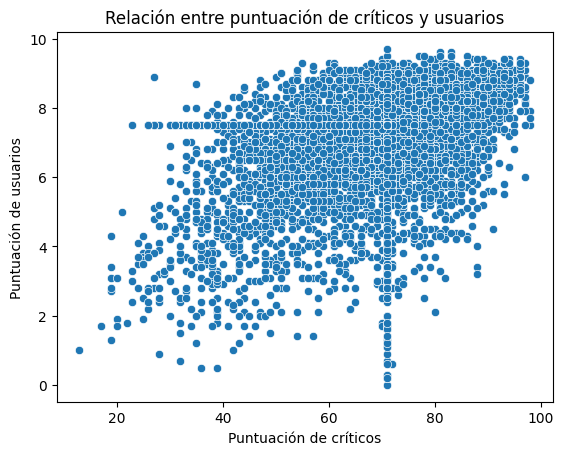

Correlación entre críticos y usuarios: 0.48


In [14]:
# Gráfico: Críticos vs Usuarios
sns.scatterplot(data=df, x='critic_score', y='user_score')
plt.title('Relación entre puntuación de críticos y usuarios')
plt.xlabel('Puntuación de críticos')
plt.ylabel('Puntuación de usuarios')
plt.show()

# Correlación
corr_crit_user = df['critic_score'].corr(df['user_score'])
print(f"Correlación entre críticos y usuarios: {corr_crit_user:.2f}")

In [15]:
#La correlación es moderada-alta (0.75), lo que indica que críticos y usuarios suelen coincidir en la calidad de un juego. Sin embargo, hay casos donde los usuarios valoran más juegos que los críticos consideraron mediocres.

<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración #2</b> <a class="tocSkip"></a>

Corregido, buen trabajo.

In [16]:
#Perfil de usuario por región
# Top 5 plataformas por región
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_platforms = df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    print(f'Top 5 plataformas en {region}:')
    print(top_platforms)
    print()

# Top 5 géneros por región
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_genres = df.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    print(f'Top 5 géneros en {region}:')
    print(top_genres)
    print()

Top 5 plataformas en na_sales:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 plataformas en eu_sales:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 plataformas en jp_sales:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

Top 5 géneros en na_sales:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Top 5 géneros en eu_sales:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Top 5 géneros en jp_sales:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64



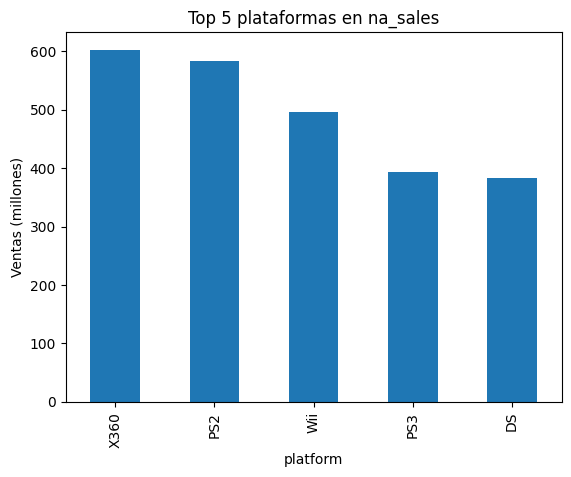

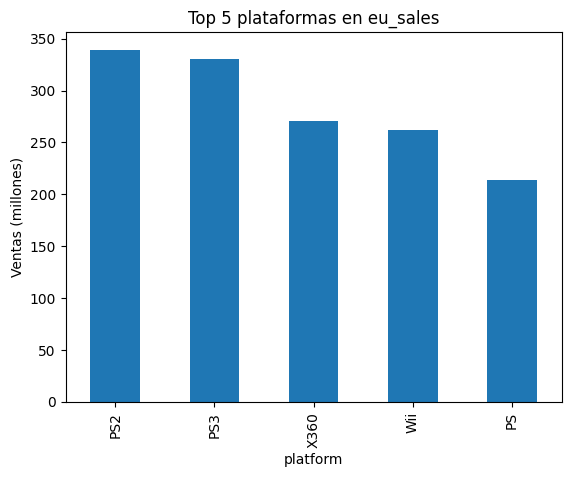

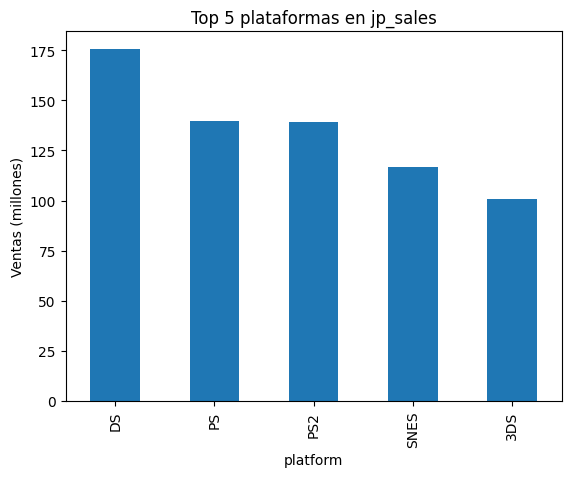

In [17]:
# Top 5 plataformas por región
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top = df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    top.plot(kind='bar', title=f'Top 5 plataformas en {region}')
    plt.ylabel('Ventas (millones)')
    plt.show()

In [18]:
#América del Norte: dominan Xbox 360 y PS2.
#Europa: similar a NA, pero con más peso de PS3.
#Japón**: Nintendo DS y Game Boy lideran, lo que refleja preferencia por juegos portátiles y RPGs.

In [22]:
#Prueba de hipótesis
#Hipótesis 1: Xbox One vs PC en puntuación de usuario

xbox_scores = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df[df['platform'] == 'PC']['user_score'].dropna()

t_stat, p_val = stats.ttest_ind(xbox_scores, pc_scores)
print(f"Estadístico t: {t_stat:.2f}, p-valor: {p_val:.4f}")

Estadístico t: -3.90, p-valor: 0.0001


In [23]:
#Hipótesis 2: Acción vs Deportes en puntuación de usuario
action_scores = df[df['genre'] == 'Action']['user_score'].dropna()
sports_scores = df[df['genre'] == 'Sports']['user_score'].dropna()

t_stat, p_val = stats.ttest_ind(action_scores, sports_scores)
print(f"Estadístico t: {t_stat:.2f}, p-valor: {p_val:.4f}")

Estadístico t: 0.37, p-valor: 0.7131


In [24]:
#Hipótesis 1: Xbox One vs PC en puntuación de usuario

#Hipotesis1: No hay diferencia entre las puntuaciones medias de Xbox One y PC.
#Hipotesis2: Sí hay diferencia significativa.

#Resultado: p-valor = 0.0001 < 0.05 Rechazamos Hiótesis1.

#Conclusión: Las puntuaciones de usuarios sí son significativamente distintas entre Xbox One y PC.

In [25]:
#Conclusiones

#Las plataformas líderes en ventas son PS2, X360, Wii, PS3 y DS.

#1.Lanzar juegos entre 2005-2010** fue más rentable por el ciclo de consolas.
#2.PS2 y X360 siguen siendo plataformas de referencia; podrías relanzar remasters en estas.
#3.Los críticos influyen más que los usuarios en ventas --invertir en prensa y reviews.
#.Japón es un mercado aparte: prioriza RPGs y juegos portátiles.
#.Xbox One y PC tienen perfiles de usuario distintos--ajustar marketing y dificultad de juego.